<a href="https://colab.research.google.com/github/gasoares23/IC/blob/main/Rhaul_Gabi_G1(GA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-opt

best_x: [0.96001321 0.82128369 0.9985851  0.99597067 0.98879272 0.95706182
 0.97770029 0.8594315  0.97162068 2.04359284 2.05196226 3.36550726
 0.56617323] 
 best_y: [-11.37323259]


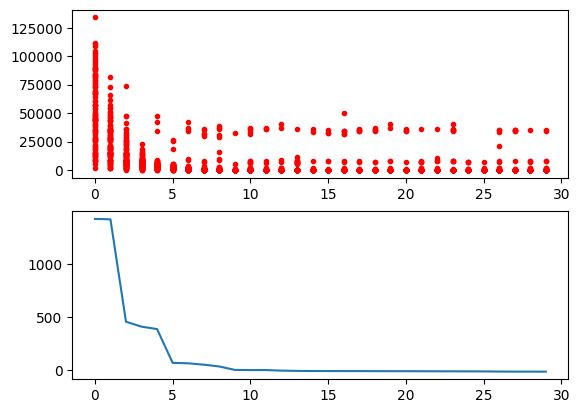

In [ ]:
import random

import matplotlib.pyplot as plt

# Definição da função objetivo
def objective_function(x):
    return 5 * x[0] + 5 * x[1] + 5 * x[2] + 5 * x[3] - 5 * (x[0]**2 + x[1]**2 + x[2]**2 + x[3]**2) - \
           (x[4] + x[5] + x[6] + x[7] + x[8] + x[9] + x[10] + x[11] + x[12])

# Definição das restrições
def restricao_desigualdade1(x):
    return 2 * x[0] + 2 * x[1] + x[9] + x[10] - 10

def restricao_desigualdade2(x):
    return 2 * x[0] + 2 * x[2] + x[9] + x[11] - 10

def restricao_desigualdade3(x):
    return 2 * x[1] + 2 * x[2] + x[10] + x[11] - 10

def restricao_desigualdade4(x):
    return -8 * x[0] + x[9]

def restricao_desigualdade5(x):
    return -8 * x[1] + x[10]

def restricao_desigualdade6(x):
    return -8 * x[2] + x[11]

def restricao_desigualdade7(x):
    return -2 * x[3] - x[4] + x[9]

def restricao_desigualdade8(x):
    return -2 * x[5] - x[6] + x[10]

def restricao_desigualdade9(x):
    return -2 * x[7] - x[8] + x[11]

# Definindo função para penalizar as restrições
def penalty_function(x):
    penalties = [
        max(0, restricao_desigualdade1(x)),
        max(0, restricao_desigualdade2(x)),
        max(0, restricao_desigualdade3(x)),
        max(0, restricao_desigualdade4(x)),
        max(0, restricao_desigualdade5(x)),
        max(0, restricao_desigualdade6(x)),
        max(0, restricao_desigualdade7(x)),
        max(0, restricao_desigualdade8(x)),
        max(0, restricao_desigualdade9(x))
    ]
    return sum(p**2 for p in penalties)

# Modificando a função fitness para incluir as penalidades das restrições
def fitness_function(x):
    return objective_function(x) + penalty_function(x)


#Executando GA

from sko.GA import GA
import pandas as pd
import matplotlib.pyplot as plt

ga = GA(func=fitness_function, n_dim=13, size_pop=100, max_iter=30, prob_mut=0.01,
        lb=[0]*13, ub=[1, 1, 1, 1, 1, 1, 1, 1, 1, 100, 100, 100, 1], precision=1e-7)

best_x, best_y = ga.run()

print('best_x:', best_x, '\n', 'best_y:', best_y)

Y_history = pd.DataFrame(ga.all_history_Y)
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()